In [129]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import pandas_ta as ta ## Technical Analysis Indicators
import yfinance as yf
from pytrends.request import TrendReq


data = yf.download(tickers = 'BTC-USD', start = '2014-09-17',end = '2022-07-10')
data.to_csv('modules/data/currencies/bitcoin/btc_dates_daily.csv')
data.head(10)
data.shape



[*********************100%%**********************]  1 of 1 completed


(2853, 6)

In [130]:
import pandas as pd
from pytrends.request import TrendReq

# Set up pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Define your keyword and date range
keyword = 'Bitcoin'
start_date = '2014-01-01'
end_date = '2022-08-01'
start = '2014-09-17'
end = '2022-07-09'

# Build the payload for weekly data
pytrends.build_payload(kw_list=[keyword], timeframe=f'{start_date} {end_date}')
df_weekly = pytrends.interest_over_time()

# Resample the weekly data to daily and fill in the values
df_daily = df_weekly.resample('D').ffill()
df_daily = df_daily.drop(columns=['isPartial'])

# Slice the DataFrame to the exact date range
df_daily = df_daily[start:end]

df_daily.to_csv('modules/data/currencies/bitcoin/trending_dates_daily.csv')  # save to csv
df_daily.shape


(2853, 1)

In [131]:
def plot_series(x, y, format="-", start=0, end=None, 
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [132]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15) ## Relative Strength Index
data['EMAF']=ta.ema(data.Close, length=20) ## Exponential Moving Average Fast
data['EMAM']=ta.ema(data.Close, length=100) ## Exponential Moving Average Medium
data['EMAS']=ta.ema(data.Close, length=150) ## Exponential Moving Average Slow

data['Target'] = data['Adj Close']-data.Open ## Target is the difference between the opening price and the future closing price
data['Target'] = data['Target'].shift(-1) ## Shift the target by one day


data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))] ## TargetClass is 1 if the price goes up and 0 if it goes down
data['TargetNextClose'] = data['Adj Close'].shift(-1) ## TargetNextClose is the future closing price

data['gTrends'] = df_daily['Bitcoin'] ## Google Trends


data.dropna(inplace=True) ## Drop the NaN values
data.reset_index(inplace = True) ## Reset the index
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [133]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(-20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,221.968994,240.259003,221.261993,235.427002,50.019072,229.312807,288.640505,327.932773,21.793015,1,257.321014
1,235.528000,259.808014,235.528000,257.321014,58.174526,231.980256,288.020317,326.997518,-22.681992,0,234.824997
2,257.506989,265.610992,227.684006,234.824997,49.315763,232.251183,286.966944,325.776690,-0.981995,0,233.843002
3,234.824997,239.520996,229.022003,233.843002,48.967016,232.402785,285.914985,324.559025,10.188004,1,243.610001
4,233.421997,245.774994,232.313995,243.610001,52.543343,233.470139,285.077263,323.486853,-7.453995,0,236.326004
...,...,...,...,...,...,...,...,...,...,...,...
2678,22487.986328,23018.951172,20950.818359,22206.792969,24.639862,28492.640709,35089.481482,37462.773483,376.109375,1,22572.839844
2679,22196.730469,22642.671875,20178.376953,22572.839844,26.519771,27928.850151,34841.627192,37265.555819,-2194.654297,0,20381.650391
2680,22576.304688,22868.921875,20265.226562,20381.650391,22.862006,27210.069221,34555.291018,37041.927933,85.763672,1,20471.482422
2681,20385.718750,21243.312500,20326.519531,20471.482422,23.326527,26568.299050,34276.403719,36822.451833,-1455.783203,0,19017.642578


In [134]:
from sklearn.preprocessing import MinMaxScaler ## Scale the data
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


sc = MinMaxScaler(feature_range=(0,1)) ## Scale the data between 0 and 1
data_set_scaled = sc.fit_transform(data_set) ## Fit and transform the data
print(data_set_scaled) ## Print the scaled data

[[1.76730917e-04 2.39565673e-04 3.27805591e-04 ... 5.10015892e-01
  1.00000000e+00 6.95198463e-04]
 [3.78083351e-04 5.24678857e-04 5.43361175e-04 ... 5.07025701e-01
  0.00000000e+00 3.61213277e-04]
 [7.04473276e-04 6.09312584e-04 4.24840499e-04 ... 5.08484658e-01
  0.00000000e+00 3.46634179e-04]
 ...
 [2.96772352e-01 2.97111660e-01 2.96512614e-01 ... 5.81819495e-01
  1.00000000e+00 3.18115490e-01]
 [3.02017333e-01 3.14267258e-01 3.03653351e-01 ... 5.14868094e-01
  1.00000000e+00 3.19504064e-01]
 [3.18194126e-01 3.22188482e-01 3.18179089e-01 ... 5.00172022e-01
  0.00000000e+00 3.17441747e-01]]


In [135]:
# multiple feature from data provided to the model
X = []

backcandles = 30 ## Number of previous candles(days) to consider
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2]) 

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2703
[[[1.76730917e-04 2.39565673e-04 3.27805591e-04 ... 0.00000000e+00
   8.54480830e-04 1.51359471e-03]
  [3.78083351e-04 5.24678857e-04 5.43361175e-04 ... 4.23545789e-05
   8.43149654e-04 1.49563545e-03]
  [7.04473276e-04 6.09312584e-04 4.24840499e-04 ... 4.66564543e-05
   8.23903952e-04 1.47219246e-03]
  ...
  [1.27798407e-03 1.06839020e-03 1.40287839e-03 ... 6.48253253e-04
   6.50589741e-04 1.12452129e-03]
  [1.24815020e-03 1.03061587e-03 1.29596208e-03 ... 6.71235777e-04
   6.53432005e-04 1.11884086e-03]
  [1.10446037e-03 9.11664784e-04 1.23006863e-03 ... 6.86809311e-04
   6.54969078e-04 1.11235768e-03]]

 [[3.78083351e-04 5.24678857e-04 5.43361175e-04 ... 4.23545789e-05
   8.43149654e-04 1.49563545e-03]
  [7.04473276e-04 6.09312584e-04 4.24840499e-04 ... 4.66564543e-05
   8.23903952e-04 1.47219246e-03]
  [3.67643695e-04 2.28802192e-04 4.45057286e-04 ... 4.90636352e-05
   8.04684075e-04 1.44881023e-03]
  ...
  [1.24815020e-03 1.03061587e-03 1.29596208e-03 ... 6.71235777e-04
   6.

In [136]:
# split data into train test sets
splitlimit = int(len(X)*0.8) ## Split the data into 80% training and 20% testing
print(splitlimit) ## Print the split limit to check
X_train, X_test = X[:splitlimit], X[splitlimit:] ## Split the data into training and testing
y_train, y_test = y[:splitlimit], y[splitlimit:] ## Split the data into training and testing
print(X_train.shape) ## Print the shape of the training data
print(X_test.shape) ## Print the shape of the testing data
print(y_train.shape) ## Print the shape of the training data
print(y_test.shape) ## Print the shape of the testing data
print(y_train) ## Print the training data

2138
(2138, 30, 8)
(535, 30, 8)
(2138, 1)
(535, 1)
[[0.00118917]
 [0.00111363]
 [0.00068003]
 ...
 [0.54070015]
 [0.53238215]
 [0.52463151]]


In [137]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [138]:
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
# Add the first LSTM layer
lstm1 = LSTM(400, return_sequences=True, name='first_layer')(lstm_input)
# Add a second LSTM layer
lstm2 = LSTM(800, name='third_layer')(lstm1)

# Add a Dense layer
dense_layer = Dense(1, name='dense_layer')(lstm2)
# Create the model
model1 = Model(inputs=lstm_input, outputs=dense_layer)
adam = optimizers.Adam()

model1.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 30, 8)]           0         
                                                                 
 first_layer (LSTM)          (None, 30, 400)           654400    
                                                                 
 third_layer (LSTM)          (None, 800)               3843200   
                                                                 
 dense_layer (Dense)         (None, 1)                 801       
                                                                 
Total params: 4498401 (17.16 MB)
Trainable params: 4498401 (17.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [139]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=adam, metrics=[RootMeanSquaredError()])


In [140]:
model1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=15, epochs=15, shuffle=True, validation_split = 0.1, callbacks=[cp1])

Epoch 1/15
143/143 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0468INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


143/143 [==============================] - 44s 290ms/step - loss: 0.0022 - root_mean_squared_error: 0.0468 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0549
Epoch 2/15
143/143 [==============================] - 38s 264ms/step - loss: 1.7930e-04 - root_mean_squared_error: 0.0134 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1566
Epoch 3/15
143/143 [==============================] - 42s 297ms/step - loss: 1.5734e-04 - root_mean_squared_error: 0.0125 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0764
Epoch 4/15
143/143 [==============================] - ETA: 0s - loss: 1.5343e-04 - root_mean_squared_error: 0.0124INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


143/143 [==============================] - 41s 286ms/step - loss: 1.5343e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0435
Epoch 5/15
143/143 [==============================] - 38s 267ms/step - loss: 1.1605e-04 - root_mean_squared_error: 0.0108 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0695
Epoch 6/15
143/143 [==============================] - 38s 265ms/step - loss: 1.2355e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0599
Epoch 7/15
143/143 [==============================] - 39s 273ms/step - loss: 1.0798e-04 - root_mean_squared_error: 0.0104 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0542
Epoch 8/15
143/143 [==============================] - 39s 272ms/step - loss: 1.2551e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0535
Epoch 9/15
143/143 [==============================] - 40s 278ms/step - loss: 1.0605e-04 - root_mean_squared_error: 0

INFO:tensorflow:Assets written to: model1/assets


143/143 [==============================] - 41s 287ms/step - loss: 1.0117e-04 - root_mean_squared_error: 0.0101 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0395
Epoch 11/15
143/143 [==============================] - ETA: 0s - loss: 1.1698e-04 - root_mean_squared_error: 0.0108INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


143/143 [==============================] - 41s 289ms/step - loss: 1.1698e-04 - root_mean_squared_error: 0.0108 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0387
Epoch 12/15
143/143 [==============================] - 40s 282ms/step - loss: 9.8173e-05 - root_mean_squared_error: 0.0099 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0495
Epoch 13/15
143/143 [==============================] - ETA: 0s - loss: 9.8913e-05 - root_mean_squared_error: 0.0099INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


143/143 [==============================] - 53s 368ms/step - loss: 9.8913e-05 - root_mean_squared_error: 0.0099 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0376
Epoch 14/15
143/143 [==============================] - 40s 276ms/step - loss: 1.4121e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0663
Epoch 15/15
143/143 [==============================] - 40s 280ms/step - loss: 9.0929e-05 - root_mean_squared_error: 0.0095 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0484


In [141]:
from keras.models import load_model
model1 = load_model('model1/')

In [142]:
y_pred = model1.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

17/17 [==============================] - 2s 90ms/step
[0.5276063] [0.45452599]
[0.51875466] [0.4868921]
[0.48402402] [0.4729644]
[0.47048697] [0.47625639]
[0.46647227] [0.47739976]
[0.4645511] [0.48042037]
[0.47036052] [0.44868909]
[0.46895683] [0.49372644]
[0.45490232] [0.50635018]
[0.46557662] [0.50565443]


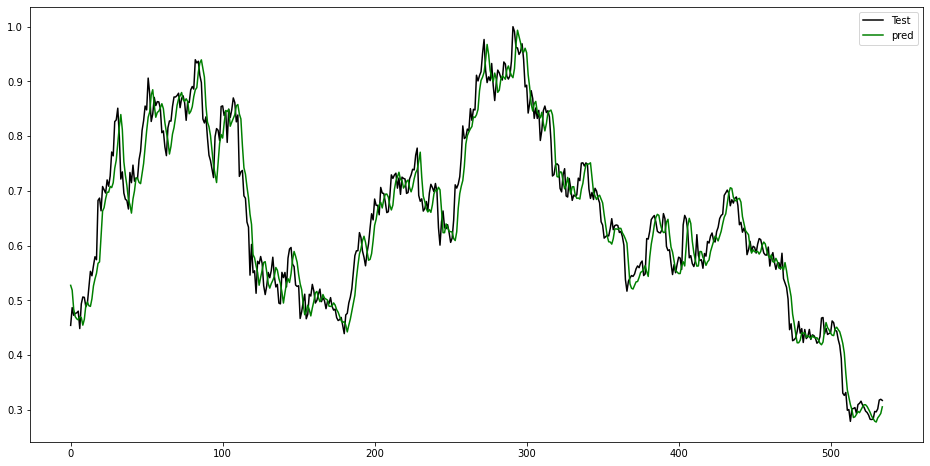

Mean Absolute_error:  29.440615326166153
Mean Squared Error:  1.4121615095064044


In [143]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()


mean_absolute_error = np.mean(tf.keras.metrics.mean_absolute_error(y_test, y_pred).numpy())
print("Mean Absolute_error: ",mean_absolute_error*1000)
mean_squared_error = np.mean(tf.keras.metrics.mean_squared_error(y_test, y_pred).numpy())
print("Mean Squared Error: ",mean_squared_error*1000)





In [144]:
# multiple feature from data provided to the model
X = []

print(data_set_scaled.shape[0])
for j in range(9):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2]) 

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2703
[[[1.76730917e-04 2.39565673e-04 3.27805591e-04 ... 8.54480830e-04
   1.51359471e-03 5.10015892e-01]
  [3.78083351e-04 5.24678857e-04 5.43361175e-04 ... 8.43149654e-04
   1.49563545e-03 5.07025701e-01]
  [7.04473276e-04 6.09312584e-04 4.24840499e-04 ... 8.23903952e-04
   1.47219246e-03 5.08484658e-01]
  ...
  [1.27798407e-03 1.06839020e-03 1.40287839e-03 ... 6.50589741e-04
   1.12452129e-03 5.07960307e-01]
  [1.24815020e-03 1.03061587e-03 1.29596208e-03 ... 6.53432005e-04
   1.11884086e-03 5.08378767e-01]
  [1.10446037e-03 9.11664784e-04 1.23006863e-03 ... 6.54969078e-04
   1.11235768e-03 5.08884696e-01]]

 [[3.78083351e-04 5.24678857e-04 5.43361175e-04 ... 8.43149654e-04
   1.49563545e-03 5.07025701e-01]
  [7.04473276e-04 6.09312584e-04 4.24840499e-04 ... 8.23903952e-04
   1.47219246e-03 5.08484658e-01]
  [3.67643695e-04 2.28802192e-04 4.45057286e-04 ... 8.04684075e-04
   1.44881023e-03 5.09235652e-01]
  ...
  [1.24815020e-03 1.03061587e-03 1.29596208e-03 ... 6.53432005e-04
   1.

In [145]:
# split data into train test sets
splitlimit = int(len(X)*0.8) ## Split the data into 80% training and 20% testing
print(splitlimit) ## Print the split limit to check
X_train, X_test = X[:splitlimit], X[splitlimit:] ## Split the data into training and testing
y_train, y_test = y[:splitlimit], y[splitlimit:] ## Split the data into training and testing
print(X_train.shape) ## Print the shape of the training data
print(X_test.shape) ## Print the shape of the testing data
print(y_train.shape) ## Print the shape of the training data
print(y_test.shape) ## Print the shape of the testing data
print(y_train) ## Print the training data

2138
(2138, 30, 9)
(535, 30, 9)
(2138, 1)
(535, 1)
[[0.00118917]
 [0.00111363]
 [0.00068003]
 ...
 [0.54070015]
 [0.53238215]
 [0.52463151]]


In [146]:
lstm_input = Input(shape=(backcandles, 9), name='lstm_input')
# Add the first LSTM layer
lstm1 = LSTM(400, return_sequences=True, name='first_layer')(lstm_input)
# Add a second LSTM layer
lstm2 = LSTM(800, name='third_layer')(lstm1)

# Add a Dense layer
dense_layer = Dense(1, name='dense_layer')(lstm2)
# Create the model
model1_GT = Model(inputs=lstm_input, outputs=dense_layer)
adam = optimizers.Adam()

model1_GT.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 30, 9)]           0         
                                                                 
 first_layer (LSTM)          (None, 30, 400)           656000    
                                                                 
 third_layer (LSTM)          (None, 800)               3843200   
                                                                 
 dense_layer (Dense)         (None, 1)                 801       
                                                                 
Total params: 4500001 (17.17 MB)
Trainable params: 4500001 (17.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [147]:
cp1_GT = ModelCheckpoint('model1/', save_best_only=True)
model1_GT.compile(loss=MeanSquaredError(), optimizer=adam, metrics=[RootMeanSquaredError()])


In [148]:
model1_GT.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=15, epochs=15, shuffle=True, validation_split = 0.1, callbacks=[cp1_GT])

Epoch 1/15
143/143 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0716INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


143/143 [==============================] - 46s 305ms/step - loss: 0.0051 - root_mean_squared_error: 0.0716 - val_loss: 0.2202 - val_root_mean_squared_error: 0.4692
Epoch 2/15
143/143 [==============================] - ETA: 0s - loss: 2.5374e-04 - root_mean_squared_error: 0.0159INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


143/143 [==============================] - 41s 289ms/step - loss: 2.5374e-04 - root_mean_squared_error: 0.0159 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0924
Epoch 3/15
143/143 [==============================] - 38s 266ms/step - loss: 1.6473e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0990
Epoch 4/15
143/143 [==============================] - 39s 272ms/step - loss: 1.6862e-04 - root_mean_squared_error: 0.0130 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0988
Epoch 5/15
143/143 [==============================] - ETA: 0s - loss: 2.1827e-04 - root_mean_squared_error: 0.0148INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


143/143 [==============================] - 41s 285ms/step - loss: 2.1827e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0581
Epoch 6/15
143/143 [==============================] - ETA: 0s - loss: 1.2606e-04 - root_mean_squared_error: 0.0112INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


143/143 [==============================] - 41s 284ms/step - loss: 1.2606e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 7/15
143/143 [==============================] - 38s 263ms/step - loss: 1.3326e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0893
Epoch 8/15
143/143 [==============================] - 38s 263ms/step - loss: 9.4071e-05 - root_mean_squared_error: 0.0097 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0572
Epoch 9/15
143/143 [==============================] - ETA: 0s - loss: 1.0222e-04 - root_mean_squared_error: 0.0101INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


143/143 [==============================] - 41s 284ms/step - loss: 1.0222e-04 - root_mean_squared_error: 0.0101 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0431
Epoch 10/15
143/143 [==============================] - 39s 275ms/step - loss: 9.0696e-05 - root_mean_squared_error: 0.0095 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0819
Epoch 11/15
143/143 [==============================] - 37s 262ms/step - loss: 1.0890e-04 - root_mean_squared_error: 0.0104 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0748
Epoch 12/15
143/143 [==============================] - ETA: 0s - loss: 6.6247e-05 - root_mean_squared_error: 0.0081INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


143/143 [==============================] - 41s 287ms/step - loss: 6.6247e-05 - root_mean_squared_error: 0.0081 - val_loss: 8.1098e-04 - val_root_mean_squared_error: 0.0285
Epoch 13/15
143/143 [==============================] - 37s 262ms/step - loss: 6.2236e-05 - root_mean_squared_error: 0.0079 - val_loss: 8.3806e-04 - val_root_mean_squared_error: 0.0289
Epoch 14/15
143/143 [==============================] - 37s 261ms/step - loss: 5.0442e-05 - root_mean_squared_error: 0.0071 - val_loss: 8.6840e-04 - val_root_mean_squared_error: 0.0295
Epoch 15/15
143/143 [==============================] - ETA: 0s - loss: 5.1255e-05 - root_mean_squared_error: 0.0072INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


143/143 [==============================] - 41s 289ms/step - loss: 5.1255e-05 - root_mean_squared_error: 0.0072 - val_loss: 8.0201e-04 - val_root_mean_squared_error: 0.0283


In [149]:
model1 = load_model('model1/')

In [150]:
y_pred = model1.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

17/17 [==============================] - 2s 98ms/step
[0.51720744] [0.45452599]
[0.4444692] [0.4868921]
[0.4922698] [0.4729644]
[0.46941078] [0.47625639]
[0.4709349] [0.47739976]
[0.46852005] [0.48042037]
[0.47527868] [0.44868909]
[0.43980283] [0.49372644]
[0.48648876] [0.50635018]
[0.47928149] [0.50565443]


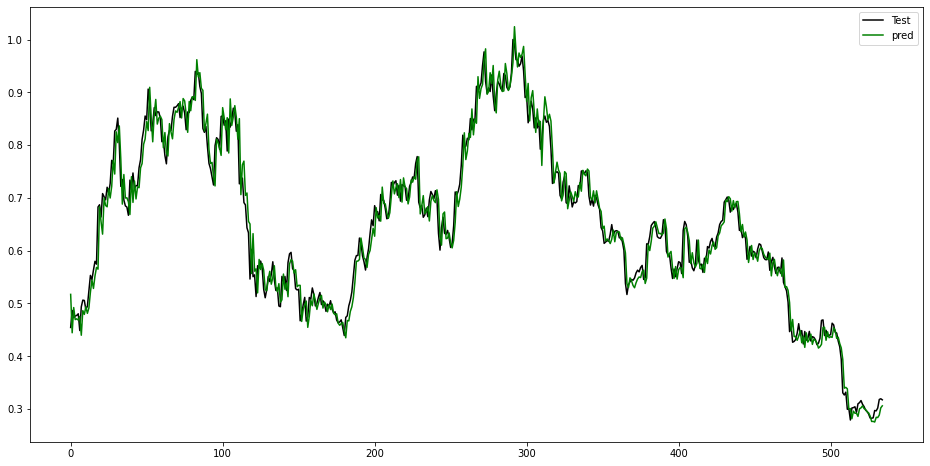

Mean Absolute_error:  20.998060703277588
Mean Squared Error:  0.8020148379728198


In [151]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()


mean_absolute_error = np.mean(tf.keras.metrics.mean_absolute_error(y_test, y_pred).numpy())
print("Mean Absolute_error: ",mean_absolute_error*1000)
mean_squared_error = np.mean(tf.keras.metrics.mean_squared_error(y_test, y_pred).numpy())
print("Mean Squared Error: ",mean_squared_error*1000)





